In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
from contract import *
import jax_lsm
import matplotlib.pyplot as plt
from LSM import *
from binary import *

## This file contains various tests that are easier to run using a notebooks REPL

In [6]:
option = Contract(110,25,call_payoff)
prices = simulate_prices(n=1_000_000)

In [11]:
len(jax.local_devices())

1

In [7]:
lsm = LSM_american(prices, option)
lsm

0.07003674795629955

In [8]:
lsm_euro = LSM_european(prices, option)
bsm_pred = bsm_call(option)[0]

In [9]:
print(f"LSM European: {lsm_euro}")
print(f"BSM European: {bsm_pred}")

LSM European: 0.01642365108325152
BSM European: 75.45568238367272


In [4]:
jax_call = jax_lsm.jax_lsm(prices, option)
jax_call

0.07220907245057145

In [5]:
jax_american = jax_lsm.LSM_american(prices, option)
jax_american

0.07220907245057145

0.06144779307722424

## Macdonald

In [14]:
option = Contract(40,25,call_payoff)
prices = simulate_prices(initial_price=41,T=25,drift=0.08, volatility=4.8373, n=10_000)[0]

In [15]:
lsm_euro = LSM_european(prices, option, discount_rate=0.08)
bsm_pred = bsm_call(option,rfr=0.08,price=41.0, vol=0.3,)[0]

In [16]:
print(f"LSM European: {lsm_euro}")
print(f"BSM European: {bsm_pred/1.08**25}")

LSM European: 13.718442227991364
BSM European: 5.306114336093512


(array([3.000e+00, 3.000e+00, 6.000e+00, 1.100e+01, 1.100e+01, 1.100e+01,
        1.500e+01, 1.800e+01, 1.800e+01, 2.600e+01, 3.700e+01, 7.000e+01,
        6.700e+01, 8.500e+01, 1.470e+02, 1.660e+02, 2.150e+02, 2.560e+02,
        3.330e+02, 4.270e+02, 5.120e+02, 5.930e+02, 6.480e+02, 7.390e+02,
        8.420e+02, 9.930e+02, 1.112e+03, 1.299e+03, 1.458e+03, 1.593e+03,
        1.769e+03, 2.042e+03, 2.237e+03, 2.341e+03, 2.492e+03, 2.552e+03,
        2.819e+03, 2.918e+03, 3.058e+03, 3.193e+03, 3.307e+03, 3.239e+03,
        3.411e+03, 3.265e+03, 3.298e+03, 3.282e+03, 3.173e+03, 3.263e+03,
        3.024e+03, 2.823e+03, 2.826e+03, 2.578e+03, 2.531e+03, 2.351e+03,
        2.196e+03, 2.088e+03, 1.871e+03, 1.693e+03, 1.517e+03, 1.410e+03,
        1.229e+03, 1.148e+03, 9.510e+02, 9.490e+02, 8.250e+02, 6.960e+02,
        5.820e+02, 5.290e+02, 4.940e+02, 3.690e+02, 3.300e+02, 2.710e+02,
        2.460e+02, 2.060e+02, 1.720e+02, 1.540e+02, 1.130e+02, 8.700e+01,
        6.600e+01, 5.900e+01, 5.600e+0

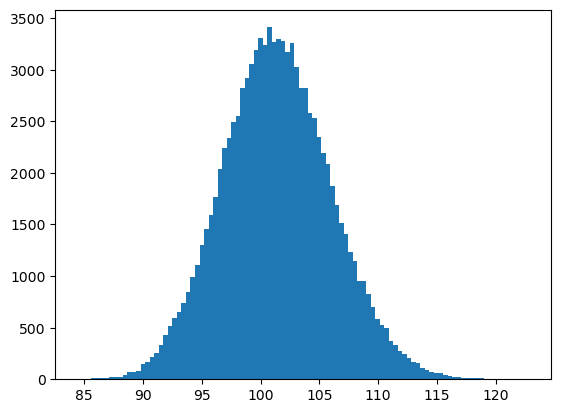

In [4]:
final_prices = prices[:,-1]
plt.hist(final_prices, bins=100)

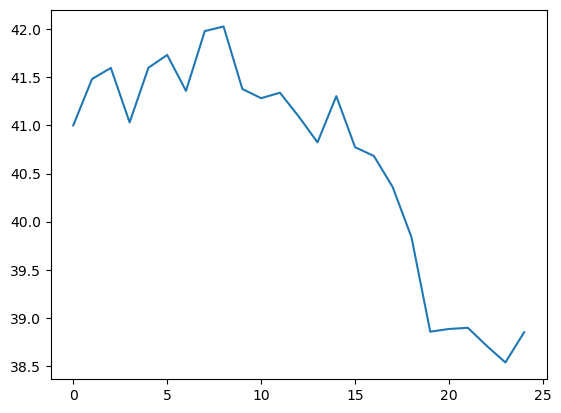

In [9]:
plt.plot(prices[:5][0])

## binomial vs lsm

In [6]:
option = Contract(strike=40.0, T=5, payoff=put_payoff, h=5/260)
prices = simulate_prices(drift=0.08,volatility=0.30, initial_price=41,T=5, n=250)
bin_price = binomial_option(option,41.0,r=0.08,vol=0.30)
lsm_prices = LSM_american(prices, option, discount_rate = 0.08)
lsm_price = np.mean(lsm_prices)
print(f'Binomial price: {bin_price}')
print(f'LSM Price: {lsm_price}')

Binomial price: 0.9478811323721867
LSM Price: 0.23450333739297038


In [8]:
strikes = [40.0, 41.0, 42.0, 45.0]
initial_prices = [39.0,41.0,42.0,45.0]
expiries = [2,3,4,5]
volatilities = [0.15,0.10,0.30,0.20]
rates = [0.08,0.06,0.10,0.12]
results = [[],[]]

for strike in strikes:
    for initial_price in initial_prices:
        for expiry in expiries:
            for volatility in volatilities:
                for rate in rates:
                    option = Contract(strike=strike, T=expiry, payoff=call_payoff, h=1/expiry)
                    prices = simulate_prices(drift=rate,volatility=volatility, initial_price=initial_price,T=expiry, n=250)
                    results[0].append(LSM_american(prices, option, discount_rate = rate)[0])
                    results[1].append(binomial_option(option,initial_price,r=rate,vol=volatility))

array([[1.        , 0.75213246],
       [0.75213246, 1.        ]])

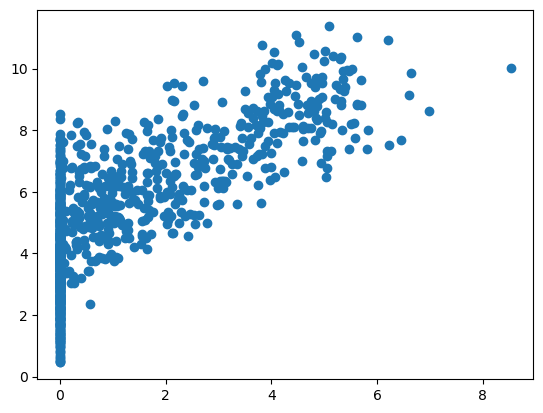

In [10]:
plt.plot(results[0],results[1],'o')
np.corrcoef(results[0],results[1])